<a href="https://colab.research.google.com/github/Enoch-lab/CAT-Scan-Localization/blob/main/Project_AI_slice_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Dataset**

In [ ]:
import pandas as pd

file_path = '/content/slice_localization_data.csv'
df = pd.read_csv(file_path)

# **EDA**

In [ ]:
print(df.head())

   patientId  value0  value1  value2  value3  value4  value5  value6  value7  \
0          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
1          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
2          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
3          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   
4          0     0.0     0.0     0.0     0.0     0.0     0.0   -0.25   -0.25   

   value8  ...  value375  value376  value377  value378  value379  value380  \
0   -0.25  ...     -0.25  0.980381       0.0       0.0       0.0       0.0   
1   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
2   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
3   -0.25  ...     -0.25  0.977008       0.0       0.0       0.0       0.0   
4   -0.25  ...     -0.25  0.976833       0.0       0.0       0.0       0.0   

   value381  value382  value383  reference  
0    

In [ ]:
dataset_shape = df.shape
print("Dataset shape:", dataset_shape)

Dataset shape: (53500, 386)


In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_count = len(categorical_columns)
numerical_count = len(numerical_columns)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Number of categorical columns:", categorical_count)
print("Number of numerical columns:", numerical_count)

Categorical columns: Index([], dtype='object')
Numerical columns: Index(['patientId', 'value0', 'value1', 'value2', 'value3', 'value4', 'value5',
       'value6', 'value7', 'value8',
       ...
       'value375', 'value376', 'value377', 'value378', 'value379', 'value380',
       'value381', 'value382', 'value383', 'reference'],
      dtype='object', length=386)
Number of categorical columns: 0
Number of numerical columns: 386


In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Columns with null values:")
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count} null values")

Columns with null values:


In [ ]:
# Replace null values with mode
df_filled = df.fillna(df.mode().iloc[0])

# Check for null values in the filled DataFrame
null_counts_filled = df_filled.isnull().sum()

# Print if there are any null values
if null_counts_filled.any():
    print("Null values:")
    print(null_counts_filled)
else:
    print("No null values found.")

No null values found.


From the above dataset, we can see that variables named as ‘value0’, ‘value1’,.. ‘value383’ contain feature values of CT scan images for each patient. The last variable is ‘reference’. This ‘reference’ is our target variable and it contains the relative location of the CT slice.


In [ ]:
df_filled.describe(include='all')

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


In [ ]:
# Getting unqiue values of the "Patient ID"
import numpy as np

np.unique(df_filled["patientId"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [ ]:
print(df_filled.columns)

Index(['patientId', 'value0', 'value1', 'value2', 'value3', 'value4', 'value5',
       'value6', 'value7', 'value8',
       ...
       'value375', 'value376', 'value377', 'value378', 'value379', 'value380',
       'value381', 'value382', 'value383', 'reference'],
      dtype='object', length=386)


In [ ]:
#dropping off unnecessary variable ‘patientId’, separating features and target variables.

df_copy = df_filled.drop(['patientId'], axis=1)
df_y = df_copy['reference']
df_x = df_copy.drop(['reference'], axis=1)

Split the Data

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

# View the split data
print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

X_train:
         value0    value1    value2    value3    value4    value5    value6  \
19113  0.000000  0.000000  0.000000  0.000000  0.939018  0.965932  0.873580   
40279  0.114286  0.020930  0.000000  0.963090  0.680756  0.558228  0.439762   
42189  0.000000  0.000000  0.000000  0.751979  0.000000  0.842081  0.904479   
30994  0.000000  0.000000  0.914286  0.855310  0.893836  0.000000  0.000000   
19373  0.000000  0.267206  0.904605  0.972478  0.856772  0.000000  0.000000   

         value7    value8  value9  ...  value374  value375  value376  \
19113  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   
40279  0.898336  0.741252    0.00  ...       0.0       0.0  0.000000   
42189  0.943744  0.699692    0.00  ...       0.0       0.0  0.994347   
30994  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   
19373  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   

       value377  value378  value379  value380  value381  value382  value383  
19113

# **Apply Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
#for test dataset

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 68.29434562989341
Mean Absolute Error: 6.123343272084307
R-squared: 0.8624473194580933


In [ ]:
#for training dataset

y_pred = lm.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 67.82275427597651
Mean Absolute Error: 6.10251339719793
R-squared: 0.8645188670291543


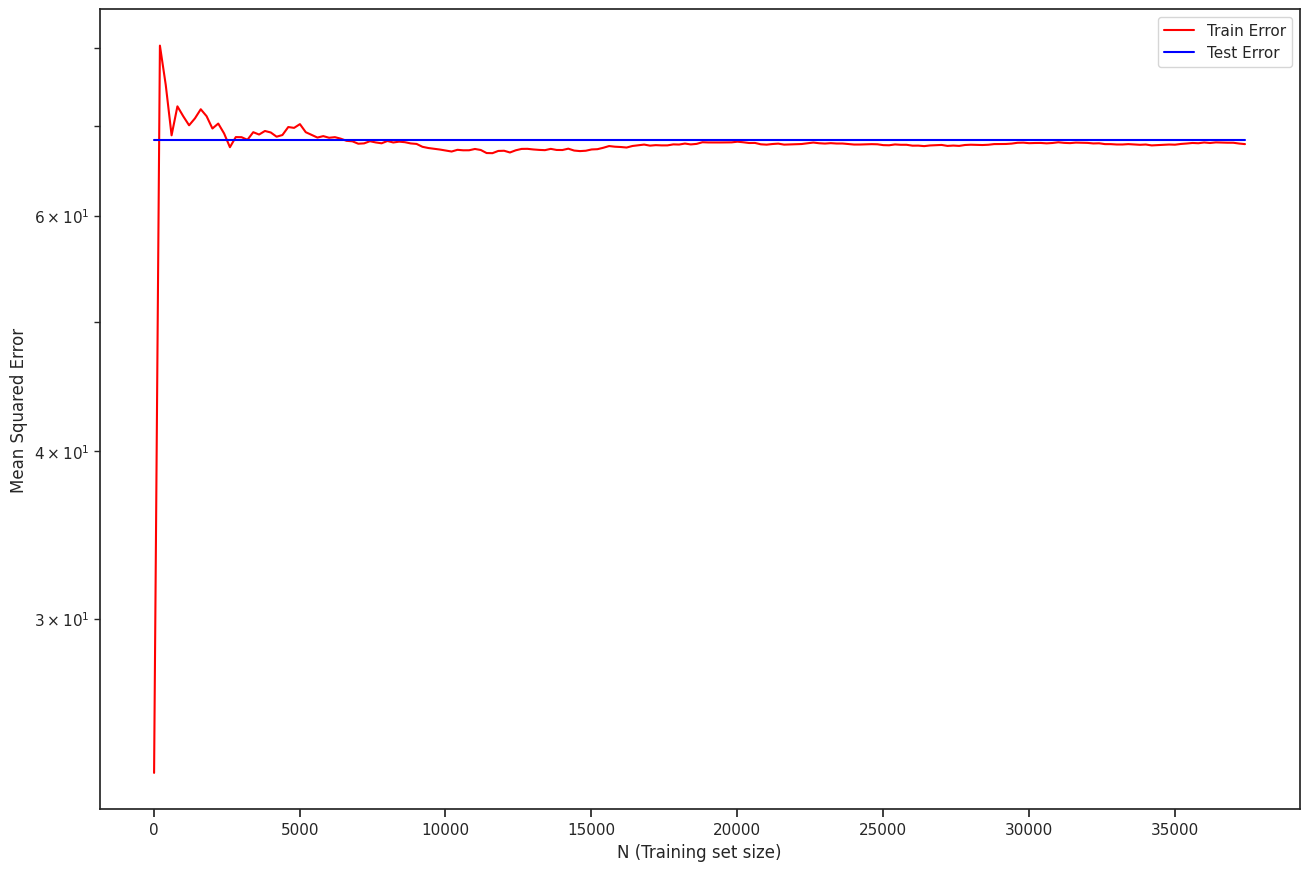

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# Define the function to plot learning curves
def plotLearningCurves(X, y, step):
    m, n = X.shape
    maxVal = (int)(m / 10) * 10
    N_size_arr = np.arange(10, maxVal + 10, step)
    error_arr = np.zeros((len(N_size_arr), 2))  # Updated line
    index = 0

    # Fitting Model
    lm.fit(X, y)

    # Increasing train dataset size, "step" times in each iteration
    for i in N_size_arr:
        # Splitting Training dataset with size i into train and cross-validation sets
        X_train_subset = X_train[:i]
        y_train_subset = y_train[:i]

        # Computing both mean squared error of the training dataset and cross-validation datasets predictions
        error_arr[index, 0] = mean_squared_error(y_train_subset, lm.predict(X_train_subset))
        error_arr[index, 1] = mean_squared_error(y_test, lm.predict(X_test))

        # Increasing index by 1
        index += 1

    # Initializing the figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_yscale('log')

    # Plotting "Training set size" vs. "Mean Squared Error" for both the training and cross-validation dataset's errors
    line1, = ax.plot(N_size_arr, error_arr[:, 0], c='red')
    line2, = ax.plot(N_size_arr, error_arr[:, 1], c='blue')

    # Adding labels and legends to our plot
    ax.set_xlabel("N (Training set size)")
    ax.set_ylabel("Mean Squared Error")

    ax.legend((line1, line2), ("Train Error", "Test Error"))

# Call the function to plot the learning curves
plotLearningCurves(X_train, y_train, 200)

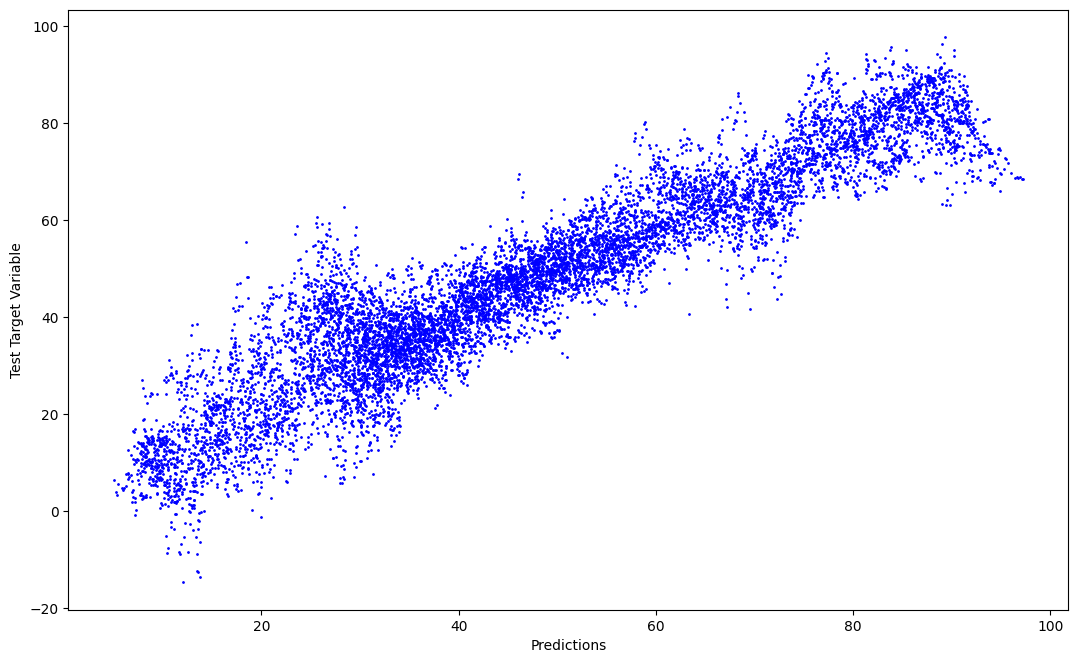

In [ ]:
# Predecting Reference values with the test dataset
y_pred = lm.predict(X_test)

# Plotting predictions vs. y_test
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel("Predictions")
ax.set_ylabel("Test Target Variable")
ax.plot(y_test, y_pred, 'bo', ms=1)

# Display the plot
plt.show()


Based on the above information, it appears that the model might be slightly overfitting. Overfitting occurs when a model learns the training data too well and performs poorly on unseen data.

The mean squared error (MSE) and mean absolute error (MAE) on the training dataset are slightly lower than on the test dataset. Additionally, the R-squared value on the training dataset is higher than on the test dataset.

High complexity model: Overfitting can occur when the model is too complex relative to the available data. With a large number of features (386) compared to the number of instances (53500), it's possible that the model has learned noise or irrelevant patterns in the training data.

## **PCA (Principal Component Analysis) process**

Feature Standarization

 1. perform the PCA to obtain the principal components and their corresponding explained variance

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_x = scaler.fit_transform(df_x)
pca = PCA(0.75)
pca_vectors = pca.fit_transform(scaled_df_x)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.14857087099269606
Explained Variance ratio by Principal Component  2  :  0.12127160889320662
Explained Variance ratio by Principal Component  3  :  0.06462374257816315
Explained Variance ratio by Principal Component  4  :  0.0381475588149197
Explained Variance ratio by Principal Component  5  :  0.03512721611270205
Explained Variance ratio by Principal Component  6  :  0.02600538748009687
Explained Variance ratio by Principal Component  7  :  0.0236911418531303
Explained Variance ratio by Principal Component  8  :  0.02112683652734274
Explained Variance ratio by Principal Component  9  :  0.01728341036602788
Explained Variance ratio by Principal Component  10  :  0.015900823601663283
Explained Variance ratio by Principal Component  11  :  0.013625919869309899
Explained Variance ratio by Principal Component  12  :  0.013201879124816818
Explained Variance ratio by Principal Component  13  :  0.012051818927837524
Explained Variance 

2. perform the PCA to obtain the principal components and their corresponding explained variance

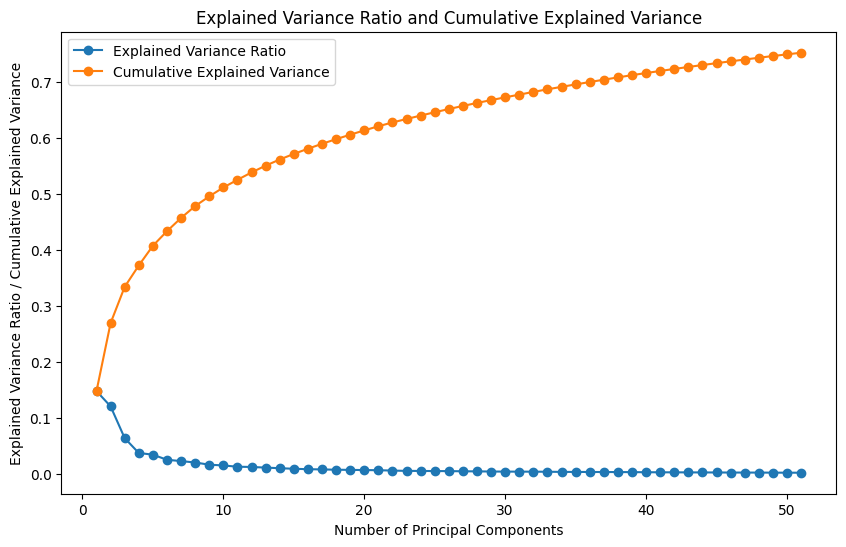

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
pca_vectors = pca.fit_transform(scaled_df_x)

# Access and print the pca_vectors
print("PCA Vectors:")
print(pca_vectors)

PCA Vectors:
[[16.76896606 -5.05825539  5.88867844 ...  0.10839189  0.73985202
   0.128996  ]
 [16.71046631 -4.73577577  6.12159463 ...  0.55161     0.47585916
  -0.07726373]
 [16.70423133 -4.70672016  6.16539874 ...  0.53677875  0.33852336
  -0.2226007 ]
 ...
 [-0.40608634  5.87885085 -1.07182577 ...  1.67626923 -0.12664218
  -0.05291041]
 [17.34383147  0.77175875  3.76159892 ...  0.68592573  0.0244999
   0.55794816]
 [ 6.42122119  1.78971353 -3.59227793 ... -1.8961141   0.74568913
   0.09583571]]


In [ ]:
import seaborn as sns

# Select a subset of principal components
subset_pca = pca_vectors[:, :20]  # Adjust the number of components as desired

# Create a DataFrame with the subset of principal components
df_subset_pca = pd.DataFrame(subset_pca, columns=[f'Principal Component {i+1}' for i in range(subset_pca.shape[1])])

# Create a scatter plot matrix
sns.set(style='ticks')
sns.pairplot(df_subset_pca)
plt.suptitle('Scatter Plot Matrix of Subset Principal Components')
plt.show()

we are able to reduce dimensions from 384 to 276

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_palette(palette='Set1')

fig_1 = plt.figure(figsize=(18,6))

sns.set(style="ticks")
sns.set_palette(palette='Set1')

sns.regplot(x=pca_vectors[:,0],y=df_y, label='Principal Component 1',x_bins=10)
sns.regplot(x=pca_vectors[:,1],y=df_y, label='Principal Component 2',x_bins=10)
sns.regplot(x=pca_vectors[:,2],y=df_y, label='Principal Component 3',x_bins=10)

plt.title('Most Important Principal Components vs Reference Value')
plt.xlabel('Principal Component Value')
plt.ylabel('Reference Value')
plt.legend()
plt.show()

NameError: ignored

<Figure size 1800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig_2 = plt.figure(figsize=(18,6))

sns.regplot(x=pca_vectors[:,48],y=df_y, label='Principal Component 49',x_bins=10)
sns.regplot(x=pca_vectors[:,50],y=df_y, label='Principal Component 50',x_bins=10)
sns.regplot(x=pca_vectors[:,49],y=df_y, label='Principal Component 51',x_bins=10)

plt.title('Least Important Principal Components vs Reference Value')
plt.xlabel('Principal Component Value')
plt.ylabel('Reference Value')
plt.legend()
plt.show()


NameError: ignored

<Figure size 1800x600 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_x, test_x, train_y, test_y = train_test_split(pca_vectors, df_y)


In [ ]:

from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=0.3)  # You can adjust the regularization strength with the alpha parameter

# Fit the model on the training data
ridge.fit(X_train, y_train)





Ridge(alpha=0.3)

In [ ]:
# Evaluate the model on the testing set
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)



Mean Squared Error: 110.92980031019438
Mean Absolute Error: 7.905080446718351
R-squared: 0.7765746015440739


In [ ]:
# Predict the target variable on the training set
y_train_pred = ridge.predict(X_train)

# Calculate evaluation metrics on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('Training Set Metrics:')
print('Mean Squared Error:', train_mse)
print('Mean Absolute Error:', train_mae)
print('R-squared:', train_r2)


Training Set Metrics:
Mean Squared Error: 114.14178679332655
Mean Absolute Error: 7.981718482155417
R-squared: 0.7719930610433183


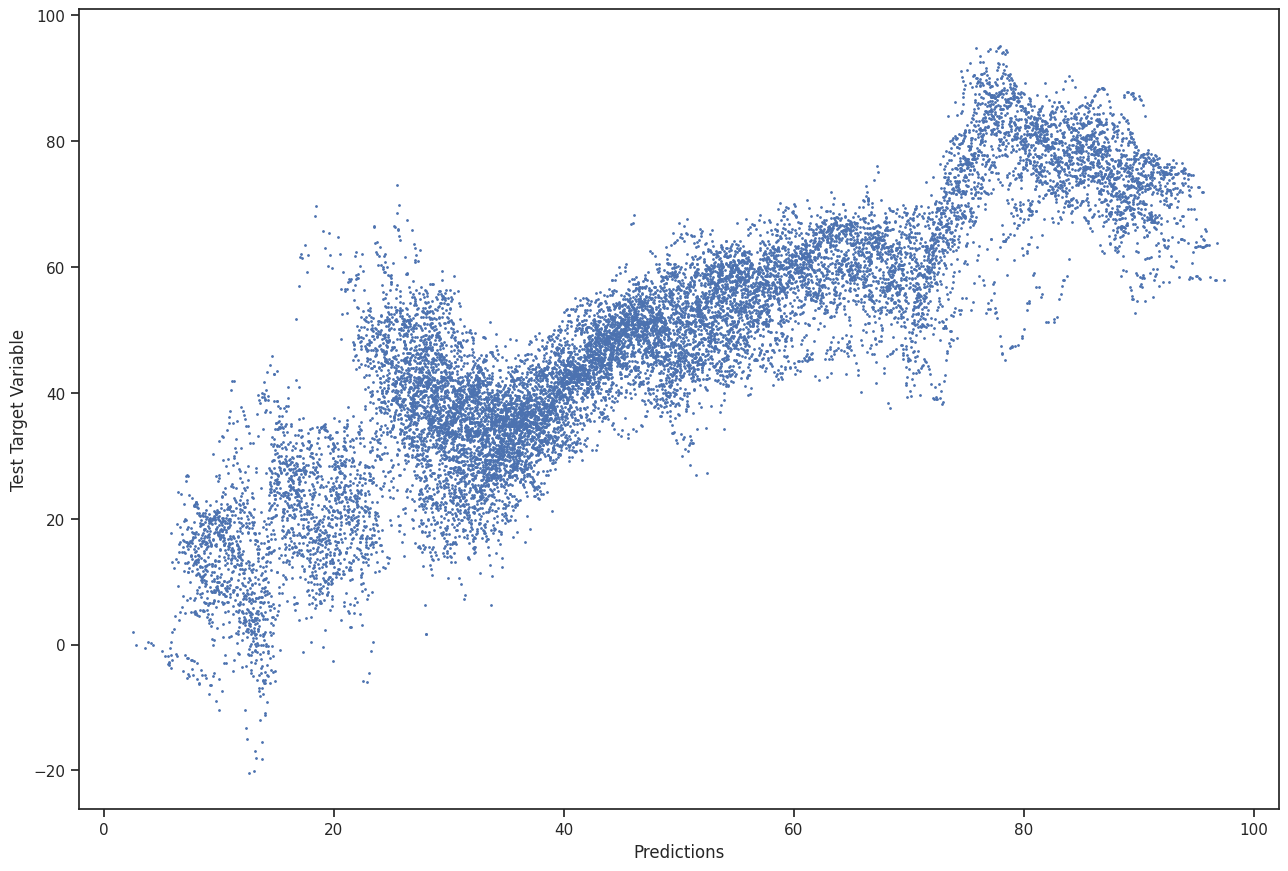

In [ ]:
# Predecting Reference values with the test dataset
y_pred = ridge.predict(X_test)

# Plotting predictions vs. y_test
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel("Predictions")
ax.set_ylabel("Test Target Variable")
ax.plot(y_test, y_pred, 'bo', ms=1)

# Display the plot
plt.show()

In [ ]:
# Fit an Elastic Net regression model
from sklearn.linear_model import ElasticNetCV
regr_en = ElasticNetCV(cv=5, alphas=[0.1, 0.3, 0.5, 0.7, 1.0])
regr_en.fit(X_train, y_train)

ElasticNetCV(alphas=[0.1, 0.3, 0.5, 0.7, 1.0], cv=5)

In [ ]:
# Evaluate the model on the testing set
y_pred = regr_en.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Iterate and fine-tune the model as needed by adjusting PCA components, alpha, l1_ratio, or other parameters
# Evaluate the model's performance and repeat the process until satisfactory results are achieved.


Mean Squared Error: 111.00126087878421
Mean Absolute Error: 7.896323828570437
R-squared: 0.7764306717256985


In [ ]:
# Predict the target variable on the training set
y_train_pred = regr_en.predict(X_train)

# Calculate evaluation metrics on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('Training Set Metrics:')
print('Mean Squared Error:', train_mse)
print('Mean Absolute Error:', train_mae)
print('R-squared:', train_r2)


Training Set Metrics:
Mean Squared Error: 114.17153948331487
Mean Absolute Error: 7.972775508700354
R-squared: 0.7719336277721163


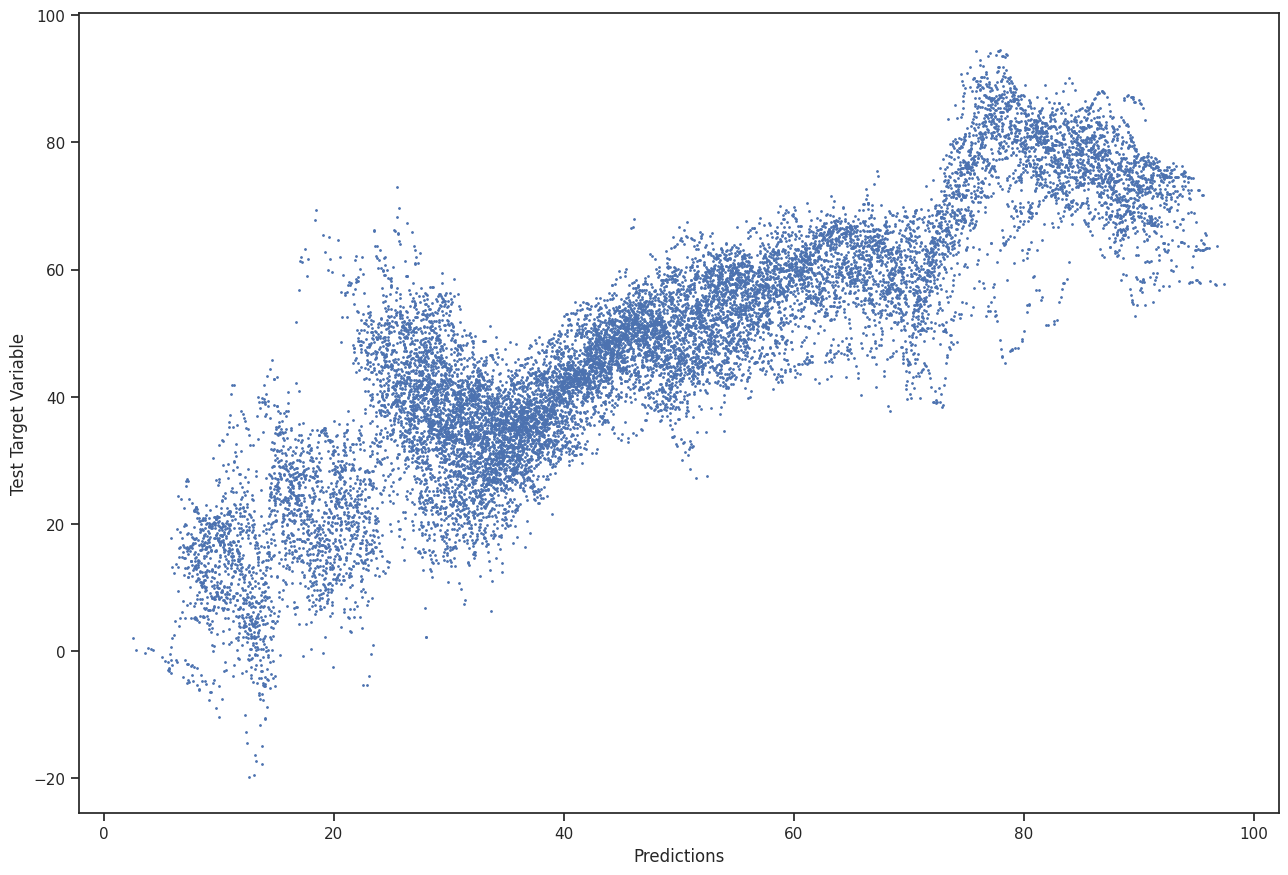

In [ ]:
# Predecting Reference values with the test dataset
y_pred = regr_en.predict(X_test)

# Plotting predictions vs. y_test
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel("Predictions")
ax.set_ylabel("Test Target Variable")
ax.plot(y_test, y_pred, 'bo', ms=1)

# Display the plot
plt.show()

In [ ]:
'''
# Statistical Features

df['mean_value'] = df.iloc[:, 1:-1].mean(axis=1)
df['std_value'] = df.iloc[:, 1:-1].std(axis=1)
df['min_value'] = df.iloc[:, 1:-1].min(axis=1)
df['max_value'] = df.iloc[:, 1:-1].max(axis=1)

# Interaction Features
df['value1_x value2_interaction'] = df['value1_x'] * df['value2']

# Difference Features
df['value1_x value2_diff'] = df['value1_x'] - df['value2']

# Rolling Window Statistics
window_size = 3
df['value1_mean_rolling'] = df['value1_x'].rolling(window=window_size).mean()
df['value1_std_rolling'] = df['value1_x'].rolling(window=window_size).std()
df['value1_max_rolling'] = df['value1_x'].rolling(window=window_size).max()


# Aggregation Features
df_agg = df.groupby('patientId')['value1_x'].mean().reset_index()
df = pd.merge(df, df_agg, on='patientId', how='left')
df.rename(columns={'value1_y': 'patient_mean_value1'}, inplace=True)

# Domain-Specific Features
# Add your domain-specific feature engineering code here

# Print the updated dataframe with engineered features
print(df.head())
